In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
from src.DataProfiler import DataProfiler
import pandas as pd
import datetime
%matplotlib inline

## Read data

In [2]:
data_path = '../data/Acc.csv'

In [3]:
df = pd.read_csv(data_path, low_memory=False)

In [4]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [5]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,05/08/2017,...,0,0,4,1,1,0,0,1,1,E01001450
1,2017010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,01/01/2017,...,0,0,4,1,2,0,0,1,1,E01004702
2,2017010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,01/01/2017,...,0,0,4,1,1,0,0,1,1,E01004298
3,2017010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,1,01/01/2017,...,0,4,4,2,2,0,0,1,1,E01001429
4,2017010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,1,01/01/2017,...,0,5,4,1,2,0,0,1,1,E01001808


## Instantiate DataProfiler

In [6]:
profiler = DataProfiler()

## Prepare the dataframe (convert date columns and categorical columns)

### We spot a date column (Date) and we are interested in a categorical column (Road_Type)

In [7]:
df_ready = profiler.prepare_dataframe(df, date_columns=['Date'], 
                                categorical_columns=['Road_Type'])

## Describe some interesting columns



Number_of_Casualties Summary Statistics:

count    129982.000000
mean          1.315513
std           0.765469
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          42.000000
Name: Number_of_Casualties, dtype: float64


Road_Type is not numerical, outliers cannot be calculated




Road_Type Summary Statistics:

count     129982
unique         6
top            6
freq       93811
Name: Road_Type, dtype: int64


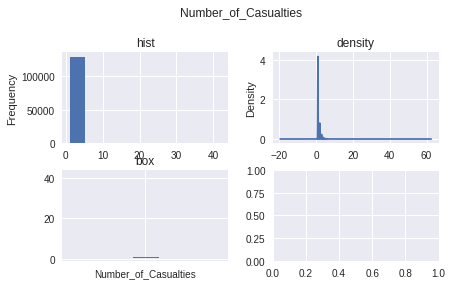

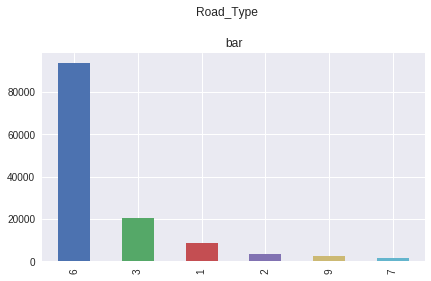

In [8]:
columns_to_plot = ['Number_of_Casualties', 'Road_Type']
result = profiler.describe_columns(df_ready, columns_to_plot)

In [9]:
result.summary_stats['Number_of_Casualties']

count    129982.000000
mean          1.315513
std           0.765469
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          42.000000
Name: Number_of_Casualties, dtype: float64

In [10]:
result.graphs['Road_Type']

{'bar': <matplotlib.axes._subplots.AxesSubplot at 0x7fc31da0b048>}

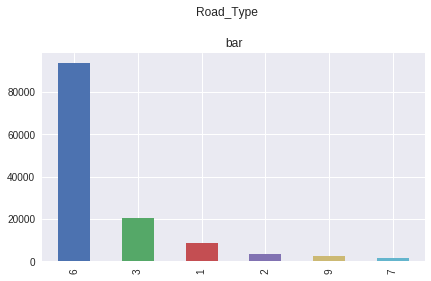

In [11]:
result.graphs['Road_Type']['bar'].figure

## Plot variable in specified time period with 10 days frequency

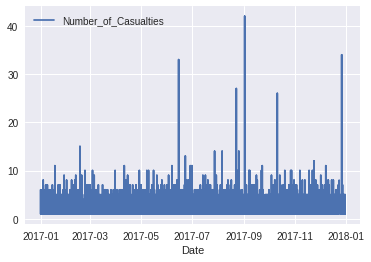

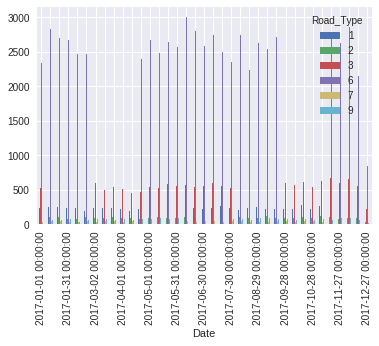

In [12]:
date_fifty_days_after_start = df_ready.Date.min() + datetime.timedelta(days=50)
column_distrib_graphs = profiler.distribution_over_time_for_columns(df_ready, 
                                                                    ['Number_of_Casualties',
                                                                     'Road_Type'],
                                                                     'Date',
                                                                     frequency='day',
                                                                     frequency_multiplier=10,
                                                                     start_date=date_fifty_days_after_start,
                                                                     end_date=None)